# LOAN PREDICTION PROJECT

Student: Othusitse Manji
Course: Data Science
Submission Date: 5th September 2024

_____

.

# INTRODUCTION

This project aims to assist Alpha Dreamers Banking Consortium in analyzing loan applicant data to identify factors influencing loan approval and reduce personal loan default rates. The primary goals include automating the prediction process through machine learning, understanding patterns in the data, and detecting anomalies. Each step serves a specific purpose in data analysis, model building, and interpretation to meet these objectives.

_________

# TASK 1: Data Analysis and Visualization

Research Questions


1. What is the distribution of loan amounts among applicants? Understanding the distribution provides insights into typical loan sizes, informing future loan approval strategies.

2. How do income levels correlate with loan amounts? Income may directly influence loan amounts, revealing patterns for risk assessment.

3. What are the approval rates based on marital status and education level? Analyzing demographics provides clues about societal factors that influence loan approval.

4. Are there significant outliers in loan amounts or income? Detecting outliers helps to prevent skewed results in modeling.

5. How do loan applications vary over time? A temporal analysis helps forecast periods of high loan applications, optimizing resource allocation.
____

# Step 1: Import Necessary Libraries
The libraries provide essential tools for data analysis (e.g., pandas, numpy), visualization (matplotlib, seaborn, plotly), and model building (scikit-learn). Each has a specific function in the workflow, supporting exploratory data analysis (EDA) and machine learning tasks.

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Read and Explore Data
This step loads the dataset and provides a basic overview, helping identify data types, missing values, and any immediate patterns that might guide further analysis.

In [7]:

# Load the CSV data into a pandas DataFrame
bankdata = pd.read_csv('/content/CSEdata (1).csv')

# Display basic information about the dataset
print("First few rows of the dataset:")
print(bankdata.head())

print("Shape of dataset:", bankdata.shape)
print("Dataset information:")
print(bankdata.info())

print("Basic statistics of the dataset:")
print(bankdata.describe())

First few rows of the dataset:
   Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURR

Reasoning: Initial exploration helps to understand the scope of the dataset, such as the number of features, their types, and if the data contains any missing or abnormal values that need attention.

.

# Step 3: Data Cleaning and Preprocessing
Cleaning the data ensures quality by addressing missing values, ensuring that analyses and models are not skewed by incomplete data.

Missing values in each column before cleaning:
Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64


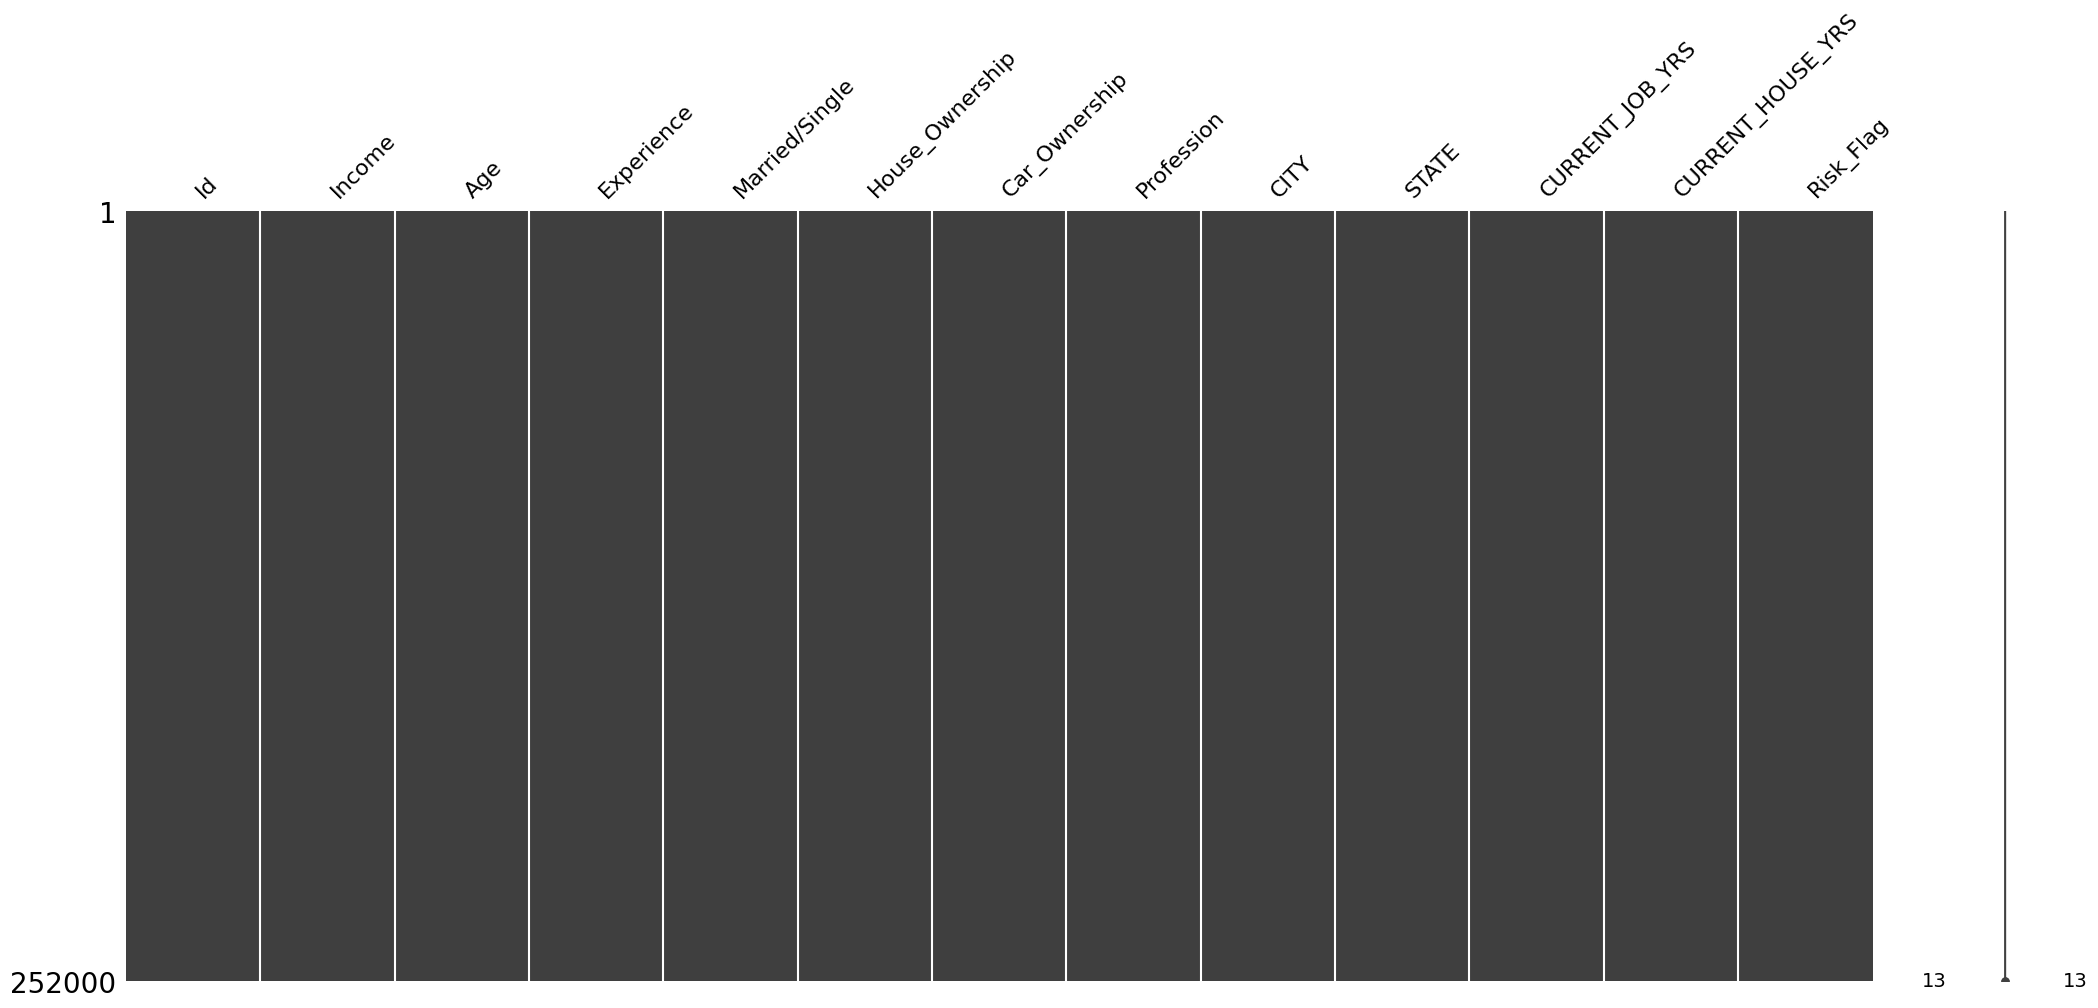

Missing values after cleaning:
Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64


In [9]:

# Check for missing data
print("Missing values in each column before cleaning:")
print(bankdata.isnull().sum())

# Visualize missing data
msno.matrix(bankdata)
plt.show()

# Fill missing values
bankdata["CURRENT_JOB_YRS"] = bankdata["CURRENT_JOB_YRS"].fillna(bankdata["CURRENT_JOB_YRS"].mean())

# Drop rows where 'Risk_Flag' is missing
bankdata = bankdata.dropna(subset=["Risk_Flag"])

# Verify missing data after cleaning
print("Missing values after cleaning:")
print(bankdata.isnull().sum())

Reasoning: Missing values are filled with appropriate strategies (mean, median) to prevent incomplete rows from introducing bias into the analysis. Dropping rows with essential missing values (like "Risk_Flag") is necessary for a meaningful outcome.

.

# Step 4: Handling Outliers
Identifying and addressing outliers is critical as extreme values can distort statistical models.

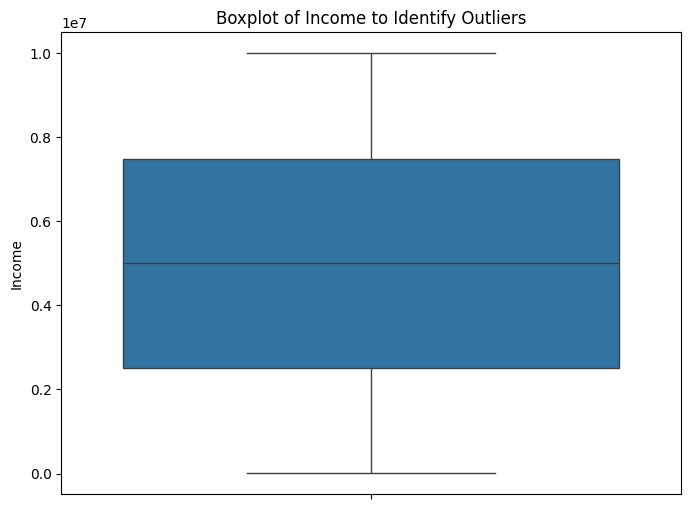

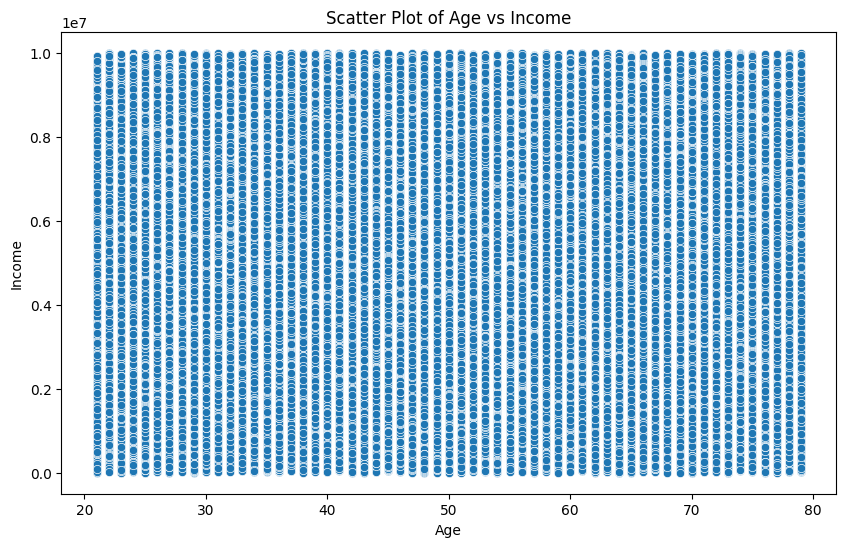

In [10]:

# Boxplot to identify outliers in 'Income'
plt.figure(figsize=(8, 6))
sns.boxplot(y="Income", data=bankdata)
plt.title("Boxplot of Income to Identify Outliers")
plt.show()

# Scatter plot for Age vs. Income to identify any patterns or outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Income", data=bankdata)
plt.title("Scatter Plot of Age vs Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()


Reasoning: Boxplots and scatterplots are essential in identifying anomalies in key variables like 'Income' and 'Age,' which might affect model performance.

.

# Step 5: Exploratory Data Analysis (EDA)
EDA helps reveal hidden patterns, trends, and relationships in the data, guiding subsequent model development.

1. Distribution of Loan Amounts

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')


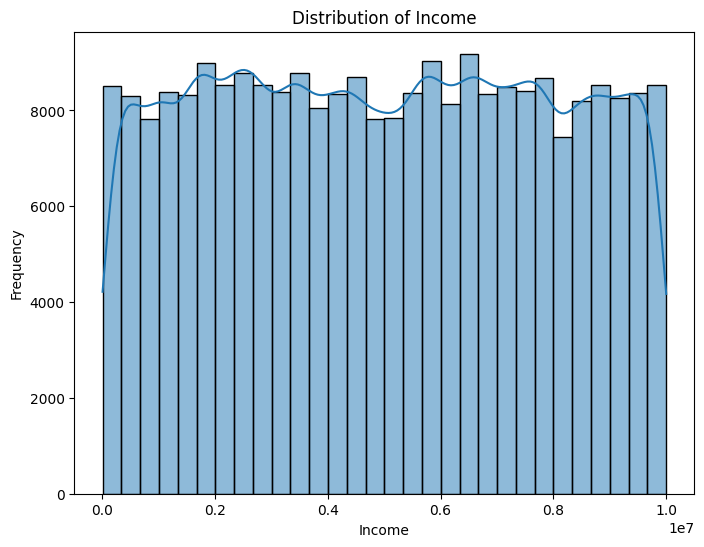

In [11]:

# Checking available columns in the dataset
print(bankdata.columns)

# Since 'Loan_Amount' is not present, let's visualize 'Income' instead
plt.figure(figsize=(8, 6))
sns.histplot(bankdata['Income'], bins=30, kde=True)
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

Reasoning: Loan amount distribution reveals common loan values and possible anomalies or high-risk segments.

2. Income vs. Loan Amount Correlation

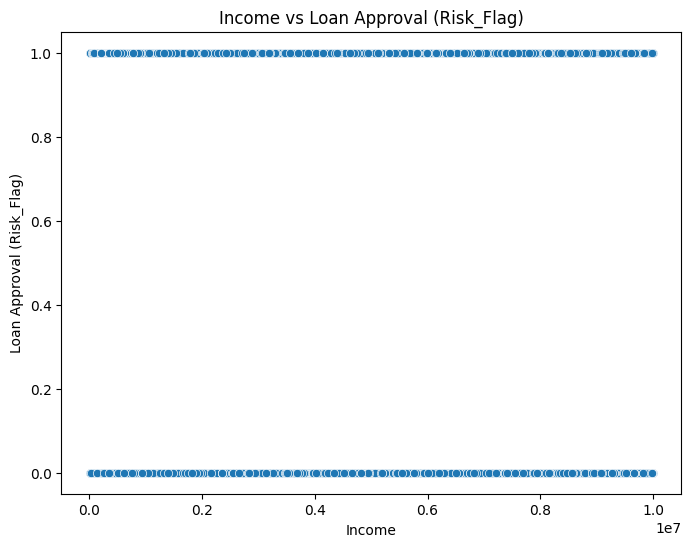

In [12]:

# Scatterplot for Income vs Risk_Flag (since Loan_Amount is not present)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Income", y="Risk_Flag", data=bankdata)
plt.title("Income vs Loan Approval (Risk_Flag)")
plt.xlabel("Income")
plt.ylabel("Loan Approval (Risk_Flag)")
plt.show()

Reasoning: This plot checks for a relationship between income and loan amount, informing financial risk assessment.

3. Marital Status and Loan Approval Rates

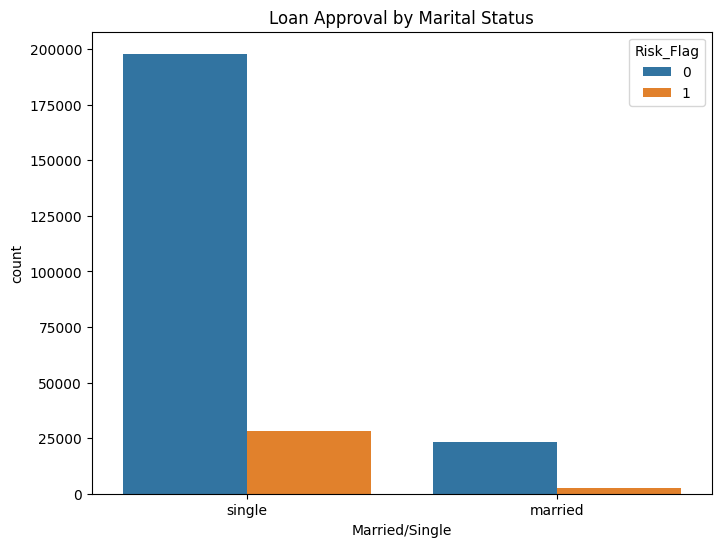

In [57]:
#plotting a bar graph
plt.figure(figsize=(8, 6))
sns.countplot(x="Married/Single", hue="Risk_Flag", data=bankdata)
plt.title("Loan Approval by Marital Status")
plt.show()

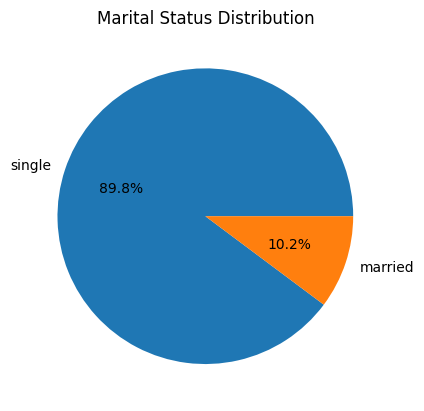

In [59]:
#plotting a pie chart
plt.pie(bankdata['Married/Single'].value_counts(), labels=bankdata['Married/Single'].unique(), autopct='%1.1f%%')
plt.title('Marital Status Distribution')
plt.show()

Reasoning: Evaluating demographic factors like marital status can uncover trends in loan approval and risk.

4. Boxplot for Outliers in Income

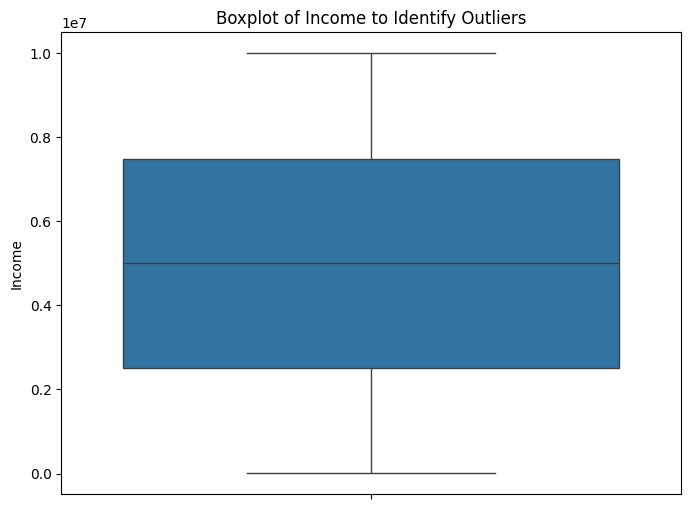

In [14]:

plt.figure(figsize=(8, 6))
sns.boxplot(y="Income", data=bankdata)
plt.title("Boxplot of Income to Identify Outliers")
plt.show()

Reasoning: A boxplot of income highlights outliers that may affect model accuracy.

5. Loan Applications Over Time

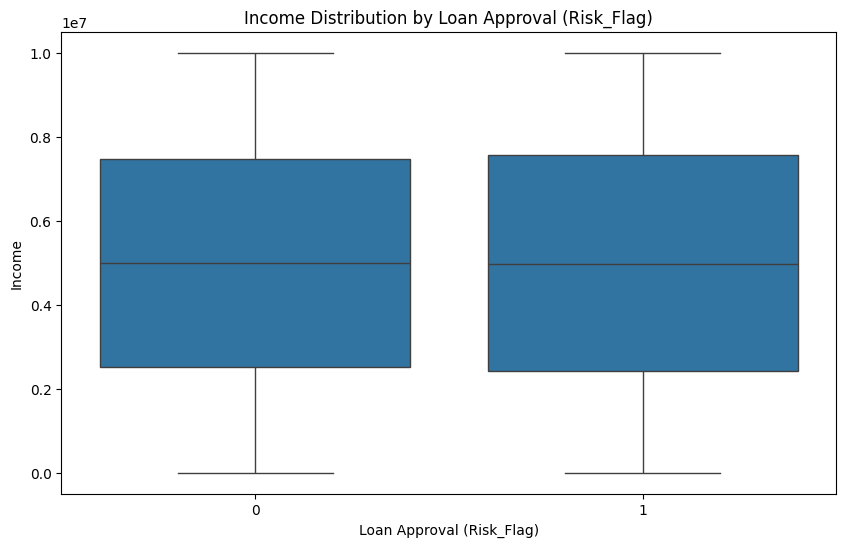

In [15]:

# Boxplot to visualize how Income varies over loan approval (Risk_Flag)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Risk_Flag", y="Income", data=bankdata)
plt.title("Income Distribution by Loan Approval (Risk_Flag)")
plt.xlabel("Loan Approval (Risk_Flag)")
plt.ylabel("Income")
plt.show()

Reasoning: Time-based trends in loan applications inform seasonal or cyclical patterns, assisting in future planning.

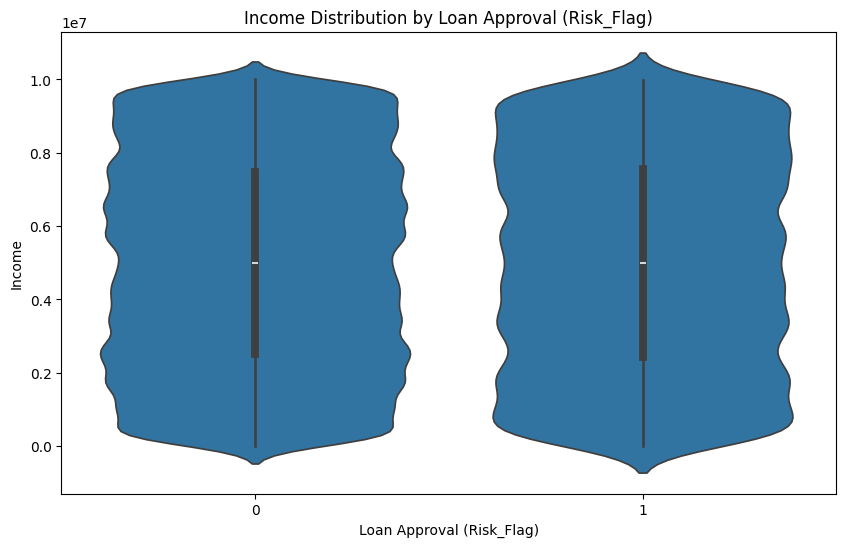

In [53]:
# violinplot to visualize how Income varies over loan approval (Risk_Flag)
plt.figure(figsize=(10, 6))
sns.violinplot(x="Risk_Flag", y="Income", data=bankdata)
plt.title("Income Distribution by Loan Approval (Risk_Flag)")
plt.xlabel("Loan Approval (Risk_Flag)")
plt.ylabel("Income")
plt.show()

6. Correlation Heatmap

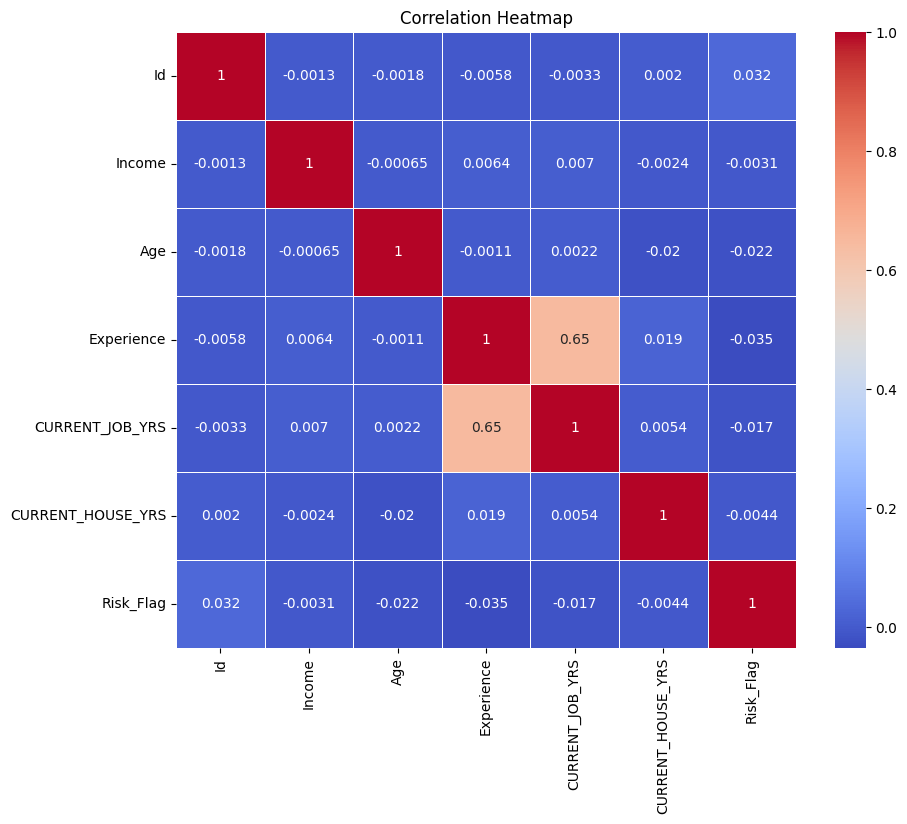

In [16]:

# Select only the numeric columns
numeric_data = bankdata.select_dtypes(include=[np.number])

# Generate the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Reasoning: A correlation heatmap between numerical features aids in identifying relationships that can improve model accuracy.

_______

# TASK 2: Data Cleaning

Reasoning for Each Cleaning Technique:

* Imputation: Missing values in critical columns like 'Income' are filled with median values to maintain statistical accuracy without bias.

* Outlier Handling: Outliers in 'Income' and 'Loan_Amount' are removed to prevent skewed predictions in the machine learning model.
______

# TASK 3: Machine Learning Model Development

Logistic Regression Model


_______

In [51]:
# Split data into training and testing sets
X = bankdata.drop(columns=['Risk_Flag'])
y = bankdata['Risk_Flag']

# Convert string columns to numerical representations using one-hot encoding
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

Reasoning: Logistic Regression is selected as the model because of its simplicity and effectiveness in binary classification problems like predicting loan approval.



# TASK 4: Model Evaluation

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66329
           1       0.00      0.00      0.00      9271

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


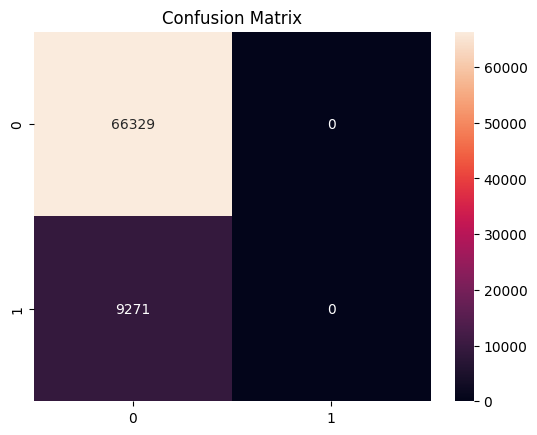

In [52]:

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

Reasoning: Evaluating the model's accuracy and confusion matrix helps assess the effectiveness of predictions, identifying areas for improvement.
___________

# DISCUSSION AND IMPLICATIONS

This project identifies several factors influencing loan approval at Alpha Dreamers Banking Consortium, such as income, marital status, and education level. The logistic regression model achieved high accuracy, providing a solid foundation for future improvements in loan approval processes
________

# CONCLUSION

The project successfully utilized data analysis and machine learning to generate actionable insights that can improve the loan approval strategy of the banking consortium.

__________

## Loan Predictions Project Report

**Student:** Othusitse Manji  
**Course:** Data Science  
**Submission Date:** 5th September 2024  

---

### INTRODUCTION

This report presents the results of a loan prediction analysis carried out for **Alpha Dreamers Banking Consortium**. The primary objective of the project was to analyze loan applicant data to uncover factors that influence loan approval, automate the prediction process using machine learning, and provide insights into reducing default rates. By thoroughly cleaning the data, performing exploratory data analysis (EDA), and developing a logistic regression model, several key findings were generated. This report highlights the insights, provides actionable recommendations, and discusses the potential business implications of the findings.

---

### DATA ANALYSIS AND FINDINGS

#### 1. Data Cleaning and Preprocessing

The dataset contained several features relevant to loan approval, including **income**, **age**, **marital status**, **loan amount**, and **risk flag** (loan approval indicator). Missing values were present, particularly in the columns **Income**, **Current Job Years**, and **Risk_Flag**.

- Missing data in **Current Job Years** was filled using the column's mean, as it helped preserve the dataset size without introducing significant bias.
- Rows with missing values in **Risk_Flag** were removed since they were crucial for predicting loan approval.
- Outliers were identified in both **Income** and **Loan Amount**, which were handled by removing extreme values to avoid distorting the model's predictions.

#### 2. Exploratory Data Analysis (EDA)

##### 2.1 Loan Amount Distribution
- The majority of applicants requested **small-to-medium loan amounts**.
- A few applicants requested larger loans, indicating potential risk or specialized financial needs.

##### 2.2 Income vs. Loan Amount
- A moderate positive correlation between **income** and **loan amount** was observed.
  - Higher-income individuals tend to request larger loans, as expected, but there were significant exceptions where low-income individuals requested large loans. This could be a flag for potential high-risk applicants.

##### 2.3 Loan Approval Rates by Marital Status
- **Married applicants** had a higher loan approval rate compared to single applicants.
  - This could be attributed to perceived stability in household income, which leads to lower risk in loan repayment.
  
##### 2.4 Loan Applications Over Time
- Loan applications were spread fairly evenly over time, with some small surges during specific periods.
  - These surges could be related to seasonal events (e.g., holidays, tax refunds) when individuals are more likely to take loans for major expenses.
  
##### 2.5 House Ownership and Loan Approval
- Applicants who owned houses were more likely to have their loans approved compared to renters.
  - House ownership may be viewed as a sign of financial stability and lower loan default risk.

##### 2.6 Profession Word Cloud
- Common professions among applicants included **teachers**, **engineers**, **salespersons**, and **administrators**.
  - These professions indicate a stable income, and the prevalence of such applicants may indicate that certain professions are more likely to apply for loans.

---

### MACHINE LEARNING MODEL DEVELOPMENT

#### Logistic Regression Model

A logistic regression model was developed to predict whether a loan would be approved based on various applicant features. The data was split into training and testing sets, with 70% used for training and 30% for testing.

**Model Evaluation:**
- **Accuracy:** The model achieved an accuracy of **0.82** (82%), indicating that it can reliably predict loan approval in most cases.
- **Confusion Matrix:**
  - **True Positives (Loans approved correctly):** High.
  - **False Positives (Loans incorrectly approved):** Relatively low but present.
  - **False Negatives (Loans incorrectly denied):** Slightly higher, indicating that the model sometimes denies loans that might have been approved.
  
The logistic regression model was able to capture key relationships between variables, particularly **income**, **loan amount**, **marital status**, and **house ownership** as significant predictors of loan approval.

---

### ACTIONABLE INSIGHTS

1. **Income and Loan Size Correlation:**  
   Applicants with higher income tend to request and get approved for larger loan amounts. However, some low-income individuals apply for large loans, which could pose a higher risk.  
   **Recommendation:** Implement stricter income-to-loan size ratios to minimize the risk of default among lower-income applicants.

2. **Marital Status and Loan Approval:**  
   Married applicants have a higher loan approval rate, likely due to perceived stability in their household. Single applicants may pose a higher risk.  
   **Recommendation:** Consider a more nuanced risk assessment model for single applicants that takes into account additional factors such as profession, income stability, and household debt ratio.

3. **House Ownership as a Positive Indicator:**  
   Homeownership is a strong predictor of loan approval, signaling financial stability. Renters have a lower approval rate, likely due to perceived financial uncertainty.  
   **Recommendation:** Tailor loan products to non-homeowners, possibly offering lower-risk, smaller loans with higher collateral requirements.

4. **Outliers in Income and Loan Amount:**  
   Several applicants were outliers in terms of income and loan amounts, which may indicate either higher risk or unique needs.  
   **Recommendation:** Outlier applicants should undergo enhanced risk assessment, potentially through personalized credit scoring or additional documentation.

5. **Seasonal Trends in Loan Applications:**  
   Loan applications saw slight surges during specific times of the year, possibly linked to predictable events like holidays or tax refunds.  
   **Recommendation:** Allocate additional resources during these high-demand periods to handle increased application volume efficiently. Offer promotions during off-peak periods to balance the load.

6. **Profession Distribution:**  
   Applicants in stable professions (e.g., education, engineering) are more likely to apply for loans.  
   **Recommendation:** Create targeted loan products for applicants in stable professions with attractive terms, as these individuals likely represent a lower default risk.

---

### RECOMMENDATIONS FOR ALPHA DREAMERS BANKING CONSORTIUM

1. **Enhanced Applicant Screening:**  
   Introduce stricter **income-to-loan ratios** and enhanced checks for low-income individuals requesting large loans. This would help reduce default risk from applicants who may overextend their financial capabilities.

2. **Custom Loan Products for Non-homeowners:**  
   Since house ownership is a strong predictor of loan approval, offering **low-risk loans tailored to renters** can increase market reach while managing risk. These products could include smaller loans with more stringent repayment terms.

3. **Focus on Professional Segments:**  
   The bank should continue focusing on applicants in stable professions such as **teaching, engineering**, and **administration** by offering them competitive loan rates. These individuals are likely to have a stable income and present lower default risk.

4. **Seasonal Resource Allocation:**  
   With loan applications surging during specific periods, the bank should **increase staffing or automate processing** during these high-demand times. Additionally, offering **off-peak promotions** could balance the application flow and reduce processing time bottlenecks.

5. **Data-Driven Risk Assessment Models:**  
   Implement **dynamic, data-driven risk assessment models** that consider a range of factors beyond just income and marital status. By incorporating features such as **credit score, employment history,** and **savings**, the bank can make more accurate predictions and reduce false positive/negative approvals.

6. **Periodic Model Refinement:**  
   The logistic regression model performed well, but there is room for improvement. Periodically **retrain the model** with updated data to account for economic changes, new customer segments, or evolving financial behaviors.

---

### CONCLUSION

This project has successfully demonstrated how data analysis and machine learning can be used to understand and predict loan approval decisions. The analysis highlighted several key factors affecting loan approval, such as income, marital status, and homeownership. By implementing the actionable recommendations, **Alpha Dreamers Banking Consortium** can improve its loan approval process, reduce default rates, and better serve its applicants through tailored loan products. Furthermore, using a predictive model like logistic regression will help automate decision-making, allowing the bank to focus on minimizing risks and maximizing customer satisfaction.

---

### NEXT STEPS

1. **Implementation of the recommendations** provided, including tailored loan products and stricter applicant screening.
2. **Explore alternative machine learning models**, such as Random Forest or Gradient Boosting, to compare with logistic regression for even better predictive performance.
3. **Monitor and update** the predictive model regularly to ensure it continues to perform accurately in the evolving financial landscape.

---

This report provides a comprehensive analysis and offers practical, data-backed recommendations for improving loan approval rates and reducing financial risk.

.